* This is my practice version based on a mix of my enrolled bootcamp programs.
* LinkedIn: https://www.linkedin.com/in/binh-nguyen-797319248/
* Email: binhnguyen.ibm@gmail.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset used in this notebook

stock_data = pd.read_csv('data/car_stocks.csv')

titanic = pd.read_csv('data/titanic.csv')
titanic_df = titanic[['pclass', 'survived', 'sex', 'age']]

In [4]:
titanic_df.age = titanic_df.age.replace(['?'], [None]).astype('float')

## **10. Group by**

In [6]:
stock_data

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600
5,RIVN,2021-11-17,160.880005,163.000000,140.350006,146.070007,146.070007,71765600
6,RIVN,2021-11-18,136.809998,138.779999,120.150002,123.379997,123.379997,63603600
7,RIVN,2021-11-19,129.979996,139.899994,125.599998,128.600006,128.600006,49368200
8,RIVN,2021-11-22,123.879997,124.930000,106.910004,118.110001,118.110001,40993900
9,RIVN,2021-11-23,117.830002,124.000000,113.000000,119.849998,119.849998,24967900


* We can that the DataFrame contains the price data for 3 different stocks RIVN, LCID, and GM.
* In these cases, we can group the data by the symbols and analyze within each group.

In [8]:
# For example it is less useful if we find the mean Close price as different stocks have different price scales

stock_data.Close.mean()

79.83897420512821

### 10.1. `groupby`

In [10]:
# If we don't use groupby, we can still use Boolean filtering by the symbol

# E.g. for RIVN
print(stock_data[stock_data.Symbol == 'RIVN']['High'].mean())

# E.g. for LCID
print(stock_data[stock_data.Symbol == 'LCID']['High'].mean())

# E.g. for GM
print(stock_data[stock_data.Symbol == 'GM']['Close'].mean())

135.30922992307694
51.81153846153847
62.16461546153845


#### 10.1.1. Single `groupby`

* We can do this more efficient by using the syntax `DF.groupby('conditional column')`.
* This will create an object DataFrameGroupBy from which we can access it specilized methods.
* Main parameters of `.groupby()`:
1. `by = 'conditional column'`
2. `axis = 0` for rows and `axis = 1` for columns.

In [13]:
stock_data.groupby('Symbol')

In [14]:
# E.g. We can find all the means with one syntax

stock_data.groupby('Symbol')['Close'].mean()

Symbol
GM       62.164615
LCID     49.829231
RIVN    127.523077
Name: Close, dtype: float64

In [15]:
# Using the dataset titanic. We can assign the groupby object to a variable name, which is convenient for later use
# Suppose we group by gender

gb_gender = titanic_df.groupby('sex')

In [16]:
gb_gender

#### 10.1.2. Methods for GroupBy object

In [18]:
# Checking the number of groups by calling .ngroups

gb_gender.ngroups

2

In [19]:
# Display the row indexes corresponding to samples (rows) in each group

gb_gender.groups

{'female': [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], 'male': [1, 3, 5, 7, 9, 10, 14, 15, 16, 19, 20, 22, 25, 26, 29, 30, 31, 34, 37, 38, 39, 40, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 62, 64, 68, 70, 71, 74, 75, 77, 80, 81, 84, 86, 87, 89, 91, 93, 94, 96, 100, 101, 106, 109, 110, 114, 115, 118, 119, 120, 123, 125, 126, 128, 132, 133, 135, 136, 138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 154, 156, 157, 158, 162, 164, 165, 166, 170, 171, 172, 173, 174, 175, 177, 179, 183, 184, 185, 189, 191, ...]}

In [20]:
# Count the values within each group

gb_gender.size()

sex
female    466
male      843
dtype: int64

In [21]:
# Display the first row within each group by calling .first()

gb_gender.first()

,pclass,survived,age
sex,,,
female,1,1,29.0000
male,1,1,0.9167


In [22]:
# Calling the DF for each group subject by calling .get_group()
# This is convenient when we want to quickly get a DF for a group

gb_gender.get_group('female')  

# filter only the rows with sex == 'female' (similar to Boolean indexing)

,pclass,survived,sex,age
0,1,1,female,29.0
2,1,0,female,2.0
4,1,0,female,25.0
6,1,1,female,63.0
8,1,1,female,53.0
...,...,...,...,...
1286,3,1,female,38.0
1290,3,1,female,47.0
1300,3,1,female,15.0
1304,3,0,female,14.5


In [23]:
# We can apply common basic computations
# It works similar as for Series, but now the outputs are grouped by the conditional column

# Example
gb_gender['age'].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

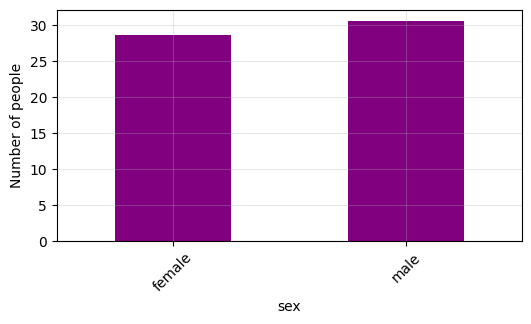

In [24]:
# Combine with plot

gb_gender['age'].mean().plot.bar(figsize = (6, 3), color = 'purple')

plt.xticks(rotation = 45)
plt.ylabel('Number of people')
plt.grid(alpha = 0.3)

In [25]:
# Another example: Count the number of survivors/non-survivors for each gender

gb_gender['survived'].value_counts()

sex     survived
female  1           339
        0           127
male    0           682
        1           161
Name: count, dtype: int64

In [26]:
# Another example: accessing multiple columns provide even more thorough outputs

gb_gender[['pclass', 'survived']].value_counts()

sex     pclass  survived
female  1       1           139
        3       0           110
                1           106
        2       1            94
                0            12
        1       0             5
male    3       0           418
        2       0           146
        1       0           118
        3       1            75
        1       1            61
        2       1            25
Name: count, dtype: int64

#### 10.1.3. `groupby` with multiple conditions

In [28]:
gb_gender_class = titanic_df.groupby(['pclass', 'sex']) # provide a list as the argument

In [29]:
# The methods applied similarly

gb_gender_class.first()

survived      age
pclass sex                      
1      female         1  29.0000
       male           1   0.9167
2      female         1  28.0000
       male           0  30.0000
3      female         1  35.0000
       male           0  42.0000

In [30]:
gb_gender_class.size()

pclass  sex   
1       female    144
        male      179
2       female    106
        male      171
3       female    216
        male      493
dtype: int64

In [31]:
gb_gender_class.age.median()

pclass  sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: age, dtype: float64

#### 10.1.4. `.agg()`

* The method `.agg()` allows us to do multiple oprations simultaneously over the specified axis.
* For example, we want to compute mean, median, mode, max, min in just one syntax.
* We can think of `.agg()` as `.apply()` but now we can implement the functions on multiple columns instead of one single column.
* Combining with `.groupby()` provides a powerful approach to Data Analysis.
* The major parameter is `func = ` which specifies the oprations we want to apply. E.g. `func = 'max'`, `func = ['median', 'mode']`...
* Some powerful property of `.agg()`:
1. We can apply it on the whole grouped DF or on a single targeted Series.
2. We can apply different functions on different specified axis. Here we need to use dictionary-like argument. See example #3 below.
3. We can use customized functions as arguments for `func = `. See example #4 below.

In [34]:
# Example 1: applying on the whole grouped DF
# This will provide a tabular output corresponding to each groupby subject and each column

gb_gender.agg(['mean', 'median', 'max', 'min'])

pclass                 survived                       age         \
            mean median max min      mean median max min       mean median   
sex                                                                          
female  2.154506    2.0   3   1  0.727468    1.0   1   0  28.687071   27.0   
male    2.372479    3.0   3   1  0.190985    0.0   1   0  30.585233   28.0   

                      
         max     min  
sex                   
female  76.0  0.1667  
male    80.0  0.3333

In [35]:
# Example 2: applying on a single Series

gb_gender['age'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
sex,,,,
female,28.687071,27.0,76.0,0.1667
male,30.585233,28.0,80.0,0.3333


In [36]:
# Example 3: applying different functions on different columns
# Suppose that for survived we want to use sum as a way to count the number of survivors

(
    gb_gender
    .agg({
        'survived': 'sum',
        'age': ['mean', 'median', 'max', 'min']
    })
)

survived        age                     
            sum       mean median   max     min
sex                                            
female      339  28.687071   27.0  76.0  0.1667
male        161  30.585233   28.0  80.0  0.3333

In [37]:
# Example 4: Recalling Python functions
# For this dataset, we see that the age range may be a useful information for analysis. Hence, we def a simple range functions

def range(series):
    return series.max() - series.min()

In [38]:
# Applying on a single series

gb_gender['age'].agg(range)

# Note that we don't need to put in any arguments for .range() here because it is applied on the target Series

sex
female    75.8333
male      79.6667
Name: age, dtype: float64

In [39]:
# Applying different functions on different columns, including built-in and customized functions

(
    gb_gender
    .agg({
        'survived': 'sum',
        'age': ['mean', 'median', 'max', 'min', range] 
    })
)

# Note that we don't need to put in any arguments for .range() here because it is applied on the Series corresponding to the key

survived        age                              
            sum       mean median   max     min    range
sex                                                     
female      339  28.687071   27.0  76.0  0.1667  75.8333
male        161  30.585233   28.0  80.0  0.3333  79.6667

Simple interpretation:
1. Among the surviviors, there were 339 females and 161 males.
2. The mean, median, max and min age of female passengers were 28.69, 27, 76 and 0.167.
3. The mean, median, max and min age of male passengers were 30.59, 28, 80 and 0.333.
4. The age ranges for female passengers and male passengers were around 76 and 80, respectively.

And we can indeed use these information to plot for more visualization.

#### 10.1.5. Adding column names for `.agg`

In [42]:
# Have a look at the columns structure

(
    gb_gender
    .agg({
        'survived': 'sum',
        'age': ['mean', 'median', 'max', 'min', range] 
    })
).columns

MultiIndex([('survived',    'sum'),
            (     'age',   'mean'),
            (     'age', 'median'),
            (     'age',    'max'),
            (     'age',    'min'),
            (     'age',  'range')],
           )

* When we apply `.agg` on multiple axis, by default will generate a MultiIndex structure. In some cases, we only want to have a single layer structure. We can adjust this by using another syntax arguments for `.agg` as\
.agg(\
col_name_1 = ('Current column 1', 'function name'/customized function)\
col_name_2 = ('Current column 2', 'function name'/customized function)\
...)

* This structure allows us to generate only a singler level output columns, as well as assigning names for them.

In [44]:
# Let's try the dataset stock_data

stock_data.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600


In [45]:
stock_data_by_symbol = stock_data.groupby('Symbol')

In [46]:
example_df = (
    stock_data_by_symbol
    .agg(
        Close_mean = ('Close', 'mean'),  # note the structure is tuple-like
        Close_range = ('Close', range),  # use customized functions
        High_mean = ('High', 'median'),
    )
)

example_df

,Close_mean,Close_range,High_mean
Symbol,,,
GM,62.164615,5.340001,63.279999
LCID,49.829231,14.770000,53.500000
RIVN,127.523077,71.279992,125.000000


In [47]:
example_df.columns

# check the column names structure (no longer MultiIndex)

Index(['Close_mean', 'Close_range', 'High_mean'], dtype='object')